# Побудова моделі


<h2>Мета</h2>

Ознайомитись з різновидами регресійних моделей. Після завершення цієї лабораторної роботи ви зможете:

* Будувати регресійні моделі кількох видів
* Оцінювати якість моделі візуально
* Оцінювати якість моделі за допомогою числових мір, без використання тестової вибірки
* Виконувати прогнозування відгуку, використовуючи побудовану модель



<div class="alert alert-danger alertdanger" style="margin-top: 20px">

# <h1 id="task">Завдання, що оцінюються </h1>

</div>

1. Скачати дані із файлу "clean_data2.csv" (Data2.csv з виправленими помилками та заповненими пропусками). Записати дані у dataframe. В попередній роботі ви визначили ознаки, що можуть бути предикторами для 'CO2 emission'. Побудуйте моделі лінійної регресії для кожного з цих предикторів.
2. Побудуйте модель множинної лінійної регресії для всіх доречних предикторів разом.
3. Побудуйте кілька поліноміальних моделей другого порядку.
4. Побудуйте візуалізації для оцінки всіх моделей.
5. Порахуйте значення R^2 та MSE для оцінки якості кожної моделі. Оберіть найкращу модель.


<a name="task1"></a>
<div class="alert alert-success alertsuccess" style="margin-top: 20px">

## <h2 id="task1">Завдання  #1: </h2>

<p>Скачати дані із файлу <a href="https://drive.google.com/file/d/1wSj5SKRPKOjNPP2cyqaNpxRCinKEmJkO/view?usp=drive_link" target="_blank">'clean_data2.csv'</a> (Data2.csv з виправленими помилками та заповненими пропусками). Записати дані у dataframe. </p><p>В попередній роботі ви визначили ознаки, що можуть бути предикторами для 'CO2 emission'. Побудуйте моделі лінійної регресії для кожного з цих предикторів.</p>
</div>

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/My Drive/data/clean_data2.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Зчитую дані з файлу у датафрейм


In [121]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
df = pd.read_csv(path)
df

,Country Name,Region,GDP per capita,Population,CO2 emission,Area,Population density
0,Afghanistan,South Asia,561.778746,34656032.0,9809.225000,652860,53.083405
1,Albania,Europe & Central Asia,4124.982390,2876101.0,5716.853000,28750,100.038296
2,Algeria,Middle East & North Africa,3916.881571,40606052.0,145400.217000,2381740,17.048902
3,American Samoa,East Asia & Pacific,11834.745230,55599.0,165114.116337,200,277.995000
4,Andorra,Europe & Central Asia,36988.622030,77281.0,462.042000,470,164.427660
...,...,...,...,...,...,...,...
212,Virgin Islands (U.S.),Latin America & Caribbean,13445.593416,102951.0,165114.116337,350,294.145714
213,West Bank and Gaza,Middle East & North Africa,2943.404534,4551566.0,165114.116337,6020,756.074086
214,"Yemen, Rep.",Middle East & North Africa,990.334774,27584213.0,22698.730000,527970,52.245796
215,Zambia,Sub-Saharan Africa,1269.573537,16591390.0,4503.076000,752610,22.045136


<p>З попередньої роботи знаємо, що хорошими показниками для 'CO2 emission' можуть бути:</p>
<ul>
    <li>ознака 1 - Population</li>
    <li>ознака 2 - Area</li>
</ul>
Розробимо моделі, використовуючи ці ознаки як змінні-предиктори.

<p>Створюю об’єкт лінійної регресії та навчаю першу модель</p>


In [122]:
from sklearn.linear_model import LinearRegression

In [123]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
lm_pop = LinearRegression()
lm_pop.fit(df[['Population']], df['CO2 emission'])
lm_pop

LinearRegression()

Знаходжу коефіцієнти моделі


In [124]:
# slope
print(lm_pop.coef_)

# intercept
print(lm_pop.intercept_)


[0.00483347]
-782.8642515405954


Отримали кінцеву лінійну модель зі структурою:
$$
Yhat1 = a + b  X
$$

Підставляючи фактичні значення, маємо:

In [125]:
# Напишіть рівняння моделі, виконувати не потрібно
CO2_emission = -782.86 + 0.005*df[['Population']]
CO2_emission

,Population
0,172497.300
1,13597.645
2,202247.400
3,-504.865
4,-396.455
...,...
212,-268.105
213,21974.970
214,137138.205
215,82174.090


Створюю об’єкт лінійної регресії та навчаю другу модель


In [126]:
lm_area = LinearRegression()
lm_area.fit(df[['Area']], df['CO2 emission'])
lm_area


LinearRegression()

Знаходжу коефіцієнти моделі


In [127]:
# slope
print(lm_area.coef_)

# intercept
print(lm_area.intercept_)


[0.259485]
4533.3581951147935


Отримали кінцеву лінійну модель зі структурою:
$$
Yhat2 = a + b  X
$$

Підставляючи фактичні значення, маємо:


In [128]:
Area = 4533.36 + 0.26*df[['Area']]

<a name="task2"></a>
<div class="alert alert-success alertsuccess" style="margin-top: 20px">

## <h2 id="task2">Завдання  #2: </h2>

<p>Побудуйте модель множинної лінійної регресії для всіх доречних предикторів разом.</p>
</div>

Створюю об’єкт лінійної регресії та навчаю множинну лінійну модель із структурою
$$
Yhat3 = a + b_1 X_1 + b_2 X_2
$$

In [129]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
lm = LinearRegression()
z = df[['Population','Area']]
lm.fit(z, df['CO2 emission'])

LinearRegression()

Знаходжу коефіцієнти моделі


In [130]:
#slope
print(lm.coef_)
#intercept
print(lm.intercept_)

[0.00407087 0.12369062]
-51153.70055281371


Підставляючи фактичні значення, маємо:

In [131]:
# Напишіть рівняння моделі, виконувати не потрібно
# CO2_emission = -51153.7 + 0.004*df['Population'] + 0.12*df['Area']

<a name="task3"></a>
<div class="alert alert-success alertsuccess" style="margin-top: 20px">

## <h2 id="task3">Завдання  #3: </h2>

<p>Побудуйте кілька поліноміальних моделей другого порядку.</p>
</div>

Створюю об’єкт поліноміальної регресії та навчаю поліноміальну модель із структурою
$$
Yhat4 = a + b_1 X_1 + b_2 X_1^2  
$$

Знаходжу коефіцієнти моделі


In [132]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
x = df['Population']
y = df['CO2 emission']
f = np.polyfit(x, y, 2)
p_population = np.poly1d(f)
print(f)

[-3.00399769e-13  5.21002024e-03 -7.94817527e+03]


Створюю об’єкт поліноміальної регресії та навчаю поліноміальну модель із структурою
$$
Yhat5 = a + b_1 X_2 + b_2 X_2^2
$$

Знаходжу коефіцієнти моделі


In [133]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
x = df['Area']
y = df['CO2 emission']
f = np.polyfit(x, y, 2)
print(f)

[-1.48432093e-08  4.35953410e-01 -4.96265022e+04]


Створюю об’єкт поліноміальної регресії та навчаю поліноміальну модель із структурою
$$
Yhat6 = a + b_1 X_1 + b_2 X_2 + b_3 X_1 X_2 + b_4 X_1^2 + b_5 X_2^2
$$

Знаходжу коефіцієнти моделі


In [134]:
from sklearn.preprocessing import PolynomialFeatures
p = PolynomialFeatures(degree=2)
p


PolynomialFeatures()

In [135]:
Z = df[['Population','Area']]
Z_p = p.fit_transform(Z)

In [136]:
Z.shape

(217, 2)

У вихідних даних 217 спостережень та 2 ознаки

In [137]:
Z_p.shape

(217, 6)

Після трансформації маємо 217 спостережень та 6 ознак

In [138]:
Yhat6 = LinearRegression()
Yhat6.fit(Z_p, df['CO2 emission'])

LinearRegression()

In [139]:
intercept = Yhat6.intercept_
slope = Yhat6.coef_
print(intercept)
print(slope)

13674.972519003117
[ 0.00000000e+00  2.26971594e-03  2.19204348e-02 -3.11058427e-12
  1.02011340e-09 -4.10609834e-09]


<a name="task4"></a>
<div class="alert alert-success alertsuccess" style="margin-top: 20px">

## <h2 id="task4">Завдання  #4: </h2>

<p>Побудуйте візуалізації для оцінки всіх моделей.</p>
</div>

Для простої лінійної регресії чудовим способом візуалізації відповідності моделі є використання графіків регресії. Цей графік покаже комбінацію розсіяних точок даних (діаграма розсіювання, scatterplot) та підігнану лінію лінійної регресії, що проходить через дані.

Таким способом візуалізую перші моделі.


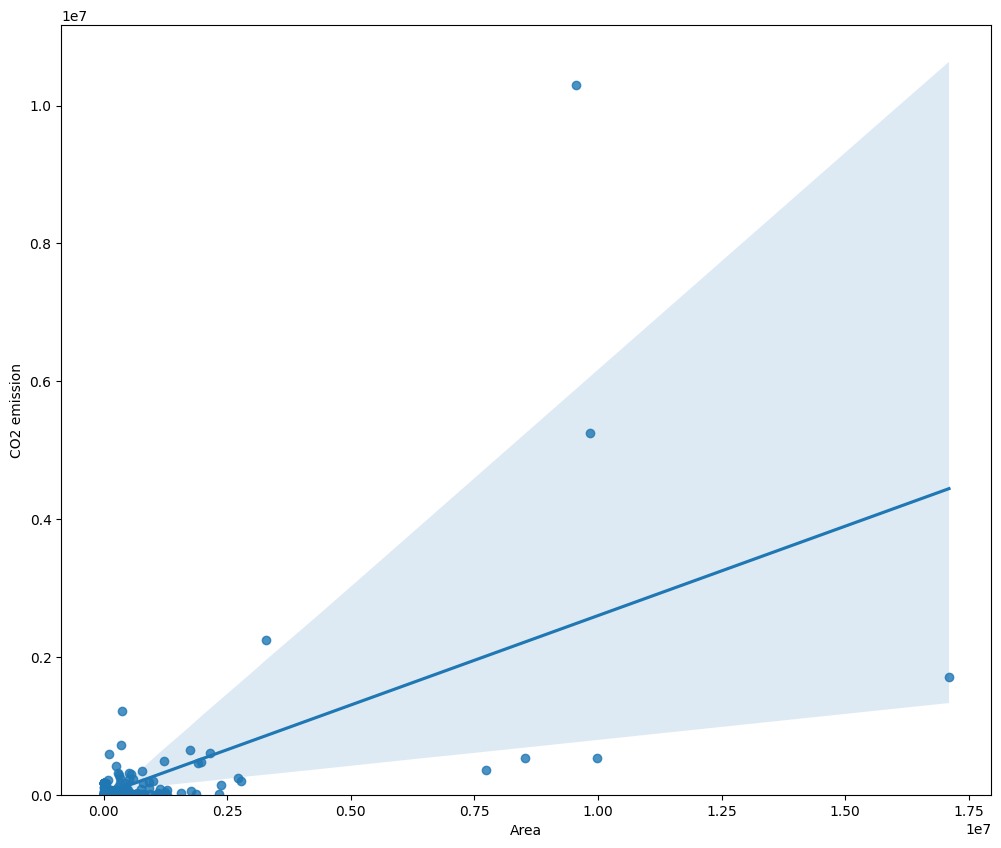

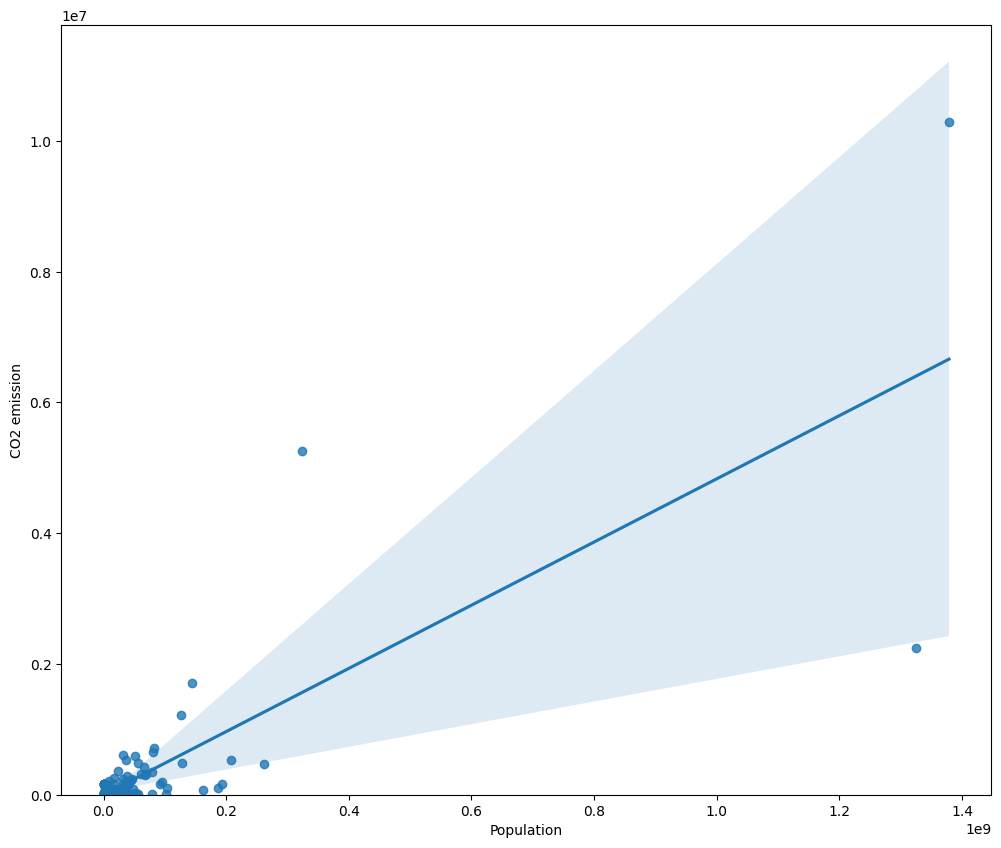

In [140]:
import seaborn as sns
%matplotlib inline
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x='Area', y='CO2 emission', data=df)
plt.ylim(0,)
plt.show()
plt.figure(figsize=(width, height))
sns.regplot(x='Population', y='CO2 emission', data=df)
plt.ylim(0,)
plt.show()


Для візуалізації дисперсії даних використаю діаграми залишків.


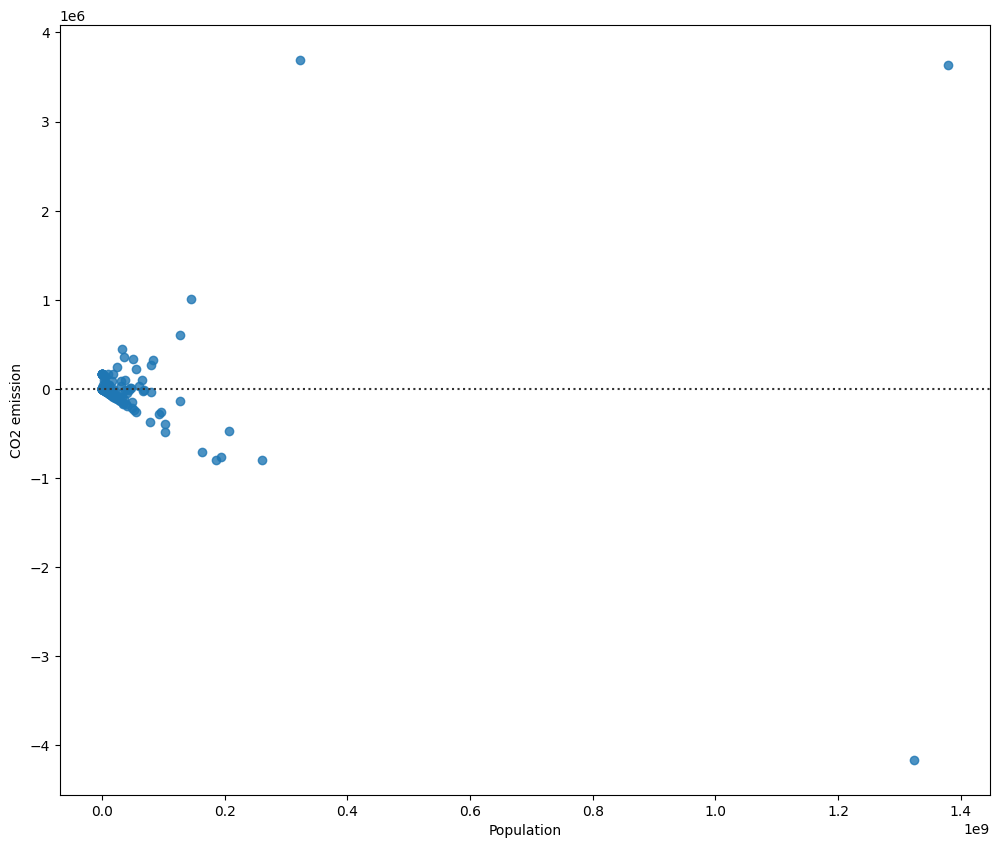

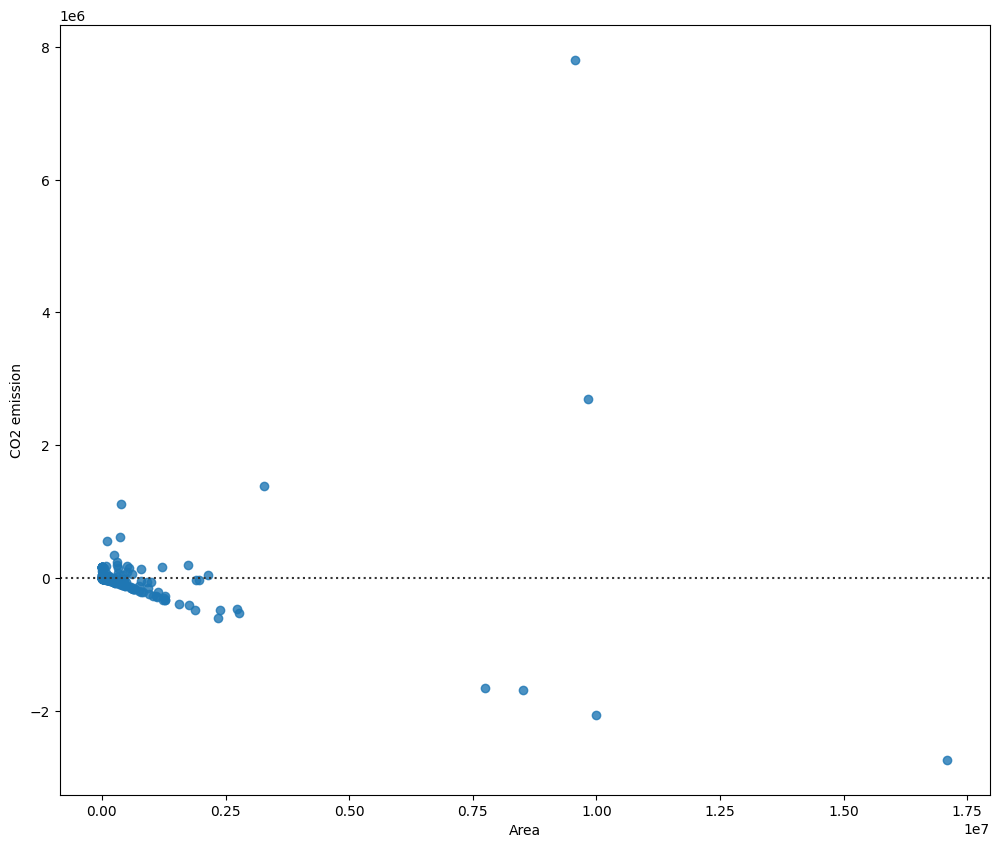

In [141]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
width = 12
height = 10

plt.figure(figsize=(width, height))
sns.residplot(x=df['Population'], y=df['CO2 emission'])
plt.show()

plt.figure(figsize=(width, height))
sns.residplot(x=df['Area'], y=df['CO2 emission'])
plt.show()

Для візуалізації моделі множинної лінійної регресії використаю діаграму розподілу.


In [142]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
z = df[['Area','Population']]
lm.fit(df[['Area','Population']], df['CO2 emission'])
Y_hat = lm.predict(z)

<ipython-input-143-c71e76d7ddfe>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['CO2 emission'], hist=False, color="r", label="Actual Value")
<ipython-input-143-c71e76d7ddfe>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_hat, hist=False, color="b", label="Fitted

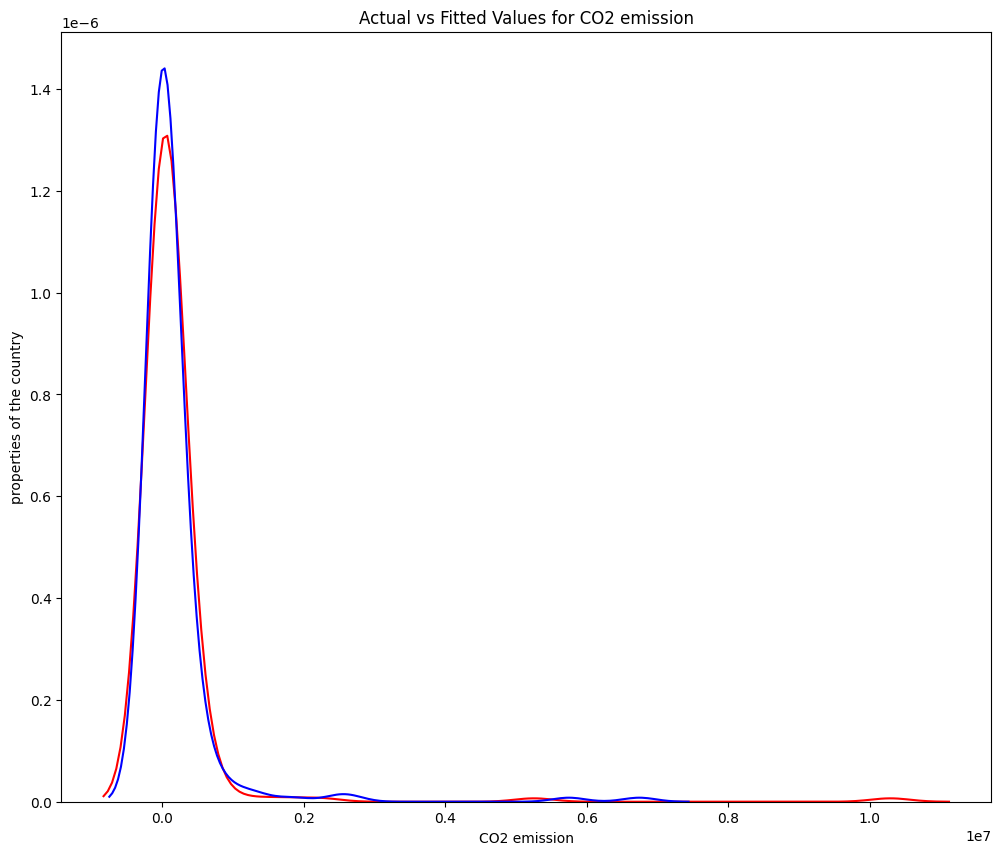

In [143]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['CO2 emission'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title("Actual vs Fitted Values for CO2 emission")
plt.xlabel("CO2 emission")
plt.ylabel("properties of the country")

plt.show()
plt.close()

Для візуалізації поліноміальних моделей з одним предиктором використаю функцію <code>poly1d</code>


In [144]:
def PlotPolly(model, independent_variable, dependent_variable, Name):
    x_new = np.linspace(independent_variable.min(), independent_variable.max(), 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variable, '.', x_new, y_new, '-')
    plt.title("Polynomial Fit with Matplotlib")
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel("Country CO2 emsission")

    plt.show()
    plt.close()

In [145]:
# Отримаємо зміннi
x = df['Population']
y = df['CO2 emission']

In [146]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
f = np.polyfit(x, y,3)
p = np.poly1d(f)
print(p)

          3             2
1.99e-20 x - 3.116e-11 x + 0.01058 x - 6.246e+04


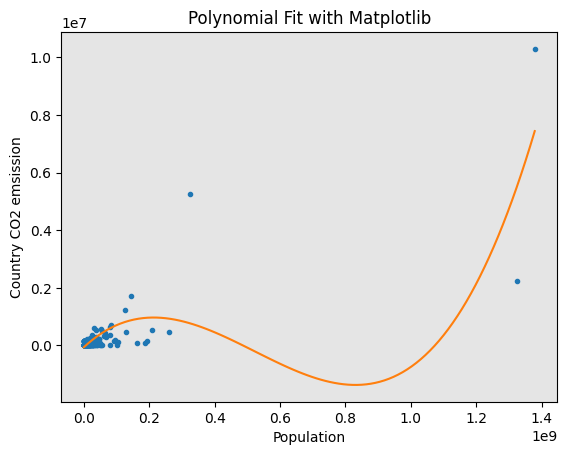

In [147]:
PlotPolly(p, x, y, 'Population')

Для візуалізації поліноміальних моделей з кількома предикторами використаю діаграму розподілу або діаграму залишків


In [148]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

X = df[['Population', 'Area']]
Y = df['CO2 emission']

lr = LinearRegression()
poly = PolynomialFeatures(degree=2)
model = Pipeline([('poly', poly), ('lr', lr)])
model.fit(X, Y)

print("Коефіцієнти моделі:")
print(model.named_steps['lr'].coef_)
print("\nIntercept (a):", model.named_steps['lr'].intercept_)

Коефіцієнти моделі:
[ 0.00000000e+00  2.26971594e-03  2.19204348e-02 -3.11058427e-12
  1.02011340e-09 -4.10609834e-09]

Intercept (a): 13674.972519003117


<ipython-input-149-3169f079d08a>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['CO2 emission'], hist=False, color="r", label="CO2 emission")
<ipython-input-149-3169f079d08a>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_predicted, hist=False, color="b", label="

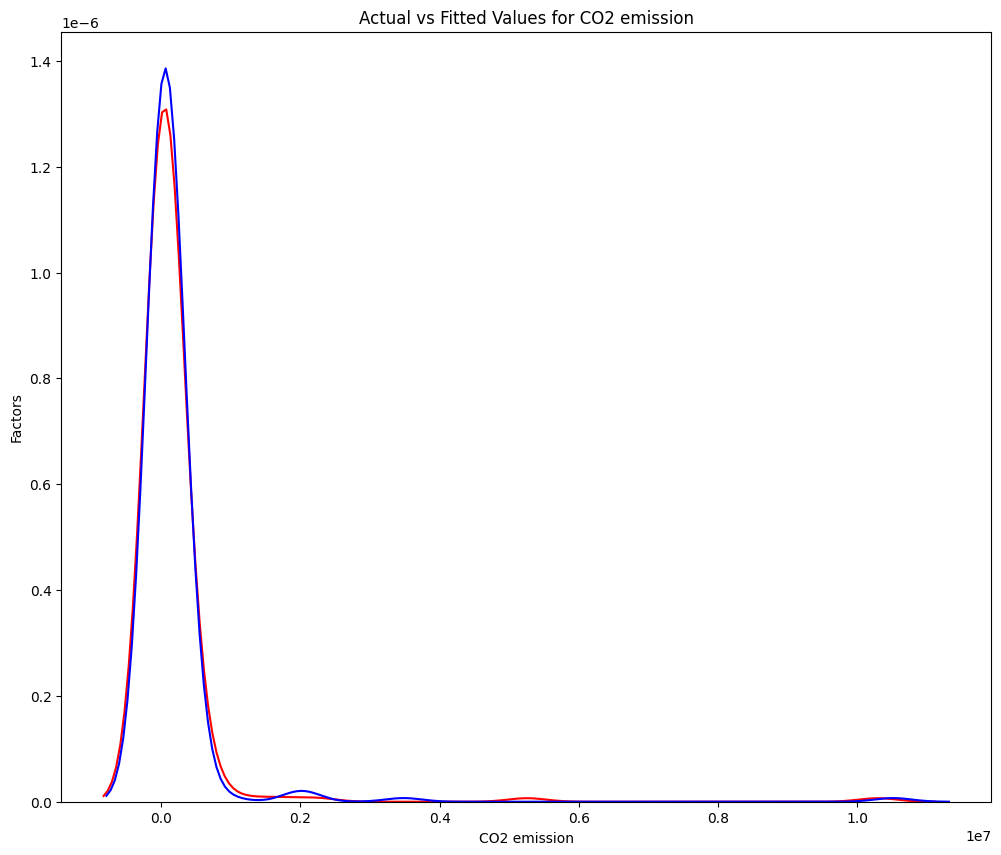

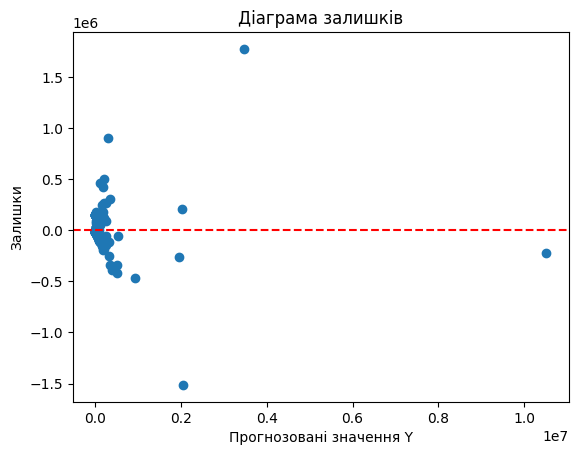

In [149]:
Y_predicted = model.predict(X)

plt.figure(figsize=(width, height))

ax1 = sns.distplot(df['CO2 emission'], hist=False, color="r", label="CO2 emission")
sns.distplot(Y_predicted, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title("Actual vs Fitted Values for CO2 emission")
plt.xlabel("CO2 emission")
plt.ylabel("Factors")

plt.show()
plt.close()

# Визначення залишків
residuals = Y - Y_predicted

# Візуалізація діаграми залишків
plt.scatter(Y_predicted, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Прогнозовані значення Y')
plt.ylabel('Залишки')
plt.title('Діаграма залишків')
plt.show()

<a name="task5"></a>
<div class="alert alert-success alertsuccess" style="margin-top: 20px">

## <h2 id="task5">Завдання  #5: </h2>

<p>Порахуйте значення R^2 та MSE для оцінки якості кожної моделі. Оберіть найкращу модель.</p>
</div>

Значення R^2 отримую безпосередньо з моделі <code>.score(X, Y)</code>, а для розрахунку MSE спочатку формую прогнозовані значення <code>.predict(X)</code> і порівнюю їх з фактичними


Модель 1:
$$
Yhat1 = a + b  X
$$


In [150]:
from sklearn.metrics import mean_squared_error

In [151]:
# Обчислення MSE
mse_yhat1 = mean_squared_error(df['CO2 emission'], lm_pop.predict(df[['Population']]))


# Вивід MSE
print(f'mse for yhat1 = {mse_yhat1}')

# Обчислення R^2

r_yhat1 = lm_pop.score(df[['Population']], df['CO2 emission'])

# Вивід R^2

print(f'R^2 for Yhat1 = {r_yhat1}')


mse for yhat1 = 232801816739.9179
R^2 for Yhat1 = 0.6435755233131817


Модель 2:
$$
Yhat2 = a + b  X
$$

In [152]:
# Обчислення MSE
mse_yhat2 = mean_squared_error(df['CO2 emission'], lm_area.predict(df[['Area']]))

# Вивід MSE
print(f'mse for yhat2  = {mse_yhat2}')

# Обчислення R^2
r_yhat2 = lm_area.score(df[['Area']], df['CO2 emission'])

# Вивід R^2
print(f'R^2 for Yhat2  = {r_yhat2}')

mse for yhat2  = 429240211045.894
R^2 for Yhat2  = 0.34282421100737426


Модель 3:
$$
Yhat3 = a + b_1 X_1 + b_2 X_2
$$

In [153]:
# Обчислення MSE
mse_yhat3 = mean_squared_error(df['CO2 emission'], lm.predict(df[['Area', 'Population']]))

# Вивід MSE
print(f'mse for yhat3  = {mse_yhat3}')

# Обчислення R^2
r_yhat3 = lm.score(df[['Area', 'Population']], df['CO2 emission'])

# Вивід R^2
print(f'R^2 for Yhat3  = {r_yhat3}')

mse for yhat3  = 192386633940.86154
R^2 for Yhat3  = 0.705452018011884


Модель 4:
$$
Yhat4 = a + b_1 X_1 + b_2 X_1^2  
$$

In [154]:
# Імпортуємо функцію r2_score з модуля metrics, оскільки використовуємо іншу функцію
from sklearn.metrics import r2_score

x = df['Population']
y = df['CO2 emission']
f = np.polyfit(x, y, 2)
p_population = np.poly1d(f)

mse_yhat4 = mean_squared_error(df['CO2 emission'], p_population(x))

# # Вивід MSE
print(f'mse for yhat4  = {mse_yhat4}')


p_population = np.poly1d(f)
# Обчислення R^2
r_yhat4 = r2_score(y, p_population(x))

# Вивід R^2
print(f'R^2 for Yhat4  = {r_yhat4}')


mse for yhat4  = 232596015620.61905
R^2 for Yhat4  = 0.643890609154327


Модель 5:
$$
Yhat5 = a + b_1 X_2 + b_2 X_2^2
$$

In [155]:
from sklearn.metrics import r2_score

x = df['Area']
y = df['CO2 emission']
f = np.polyfit(x, y, 2)
p_area = np.poly1d(f)

mse_yhat5 = mean_squared_error(df['CO2 emission'], p_area(x))

# # Вивід MSE
print(f'mse for yhat5  = {mse_yhat5}')


p_area = np.poly1d(f)
# Обчислення R^2
r_yhat5 = r2_score(y, p_area(x))

# Вивід R^2
print(f'R^2 for Yhat5  = {r_yhat5}')



mse for yhat5  = 411586514354.2175
R^2 for Yhat5  = 0.3698523918567882


Модель 6:
$$
Yhat6 = a + b_1 X_1 + b_2 X_2 + b_3 X_1 X_2 + b_4 X_1^2 + b_5 X_2^2
$$

In [156]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
from sklearn.metrics import r2_score

y_pred = Yhat6.predict(Z_p)

# Обчислення R^2
r_squared = r2_score(df['CO2 emission'], y_pred)

# Обчислення MSE
mse = mean_squared_error(df['CO2 emission'], y_pred)

print(f'R^2 for Yhat6 = {r_squared}')
print(f'mse for Yhat6 = {mse}')

R^2 for Yhat6 = 0.9359013231949528
mse for Yhat6 = 41866620804.36097


<h4>Висновок</h4>

<p>Порівнюючи всі моделі, роблю висновок, що <b>модель 6 є найкращою моделлю</b> для прогнозування 'CO2 emission' на основі нашого набору даних. </p>


<a name="task6"></a>
<div class="alert alert-success alertsuccess" style="margin-top: 20px">

## <h2 id="task6"> Додаткове завдання: </h2>

<p>Побудуйте та оцініть кілька поліноміальних моделей різних порядків.</p>
</div>

1. Побудуйте кілька поліноміальних моделей різних порядків.
2. Побудуйте візуалізації для оцінки всіх моделей.
3. Порахуйте значення R^2 та MSE для оцінки якості кожної моделі. Оберіть найкращу модель.


Будую поліноміальні моделі 2, 3 та 4 порядків.


In [157]:
x = df['Area']
y = df['CO2 emission']

f1 = np.polyfit(x, y, 2)
p1 = np.poly1d(f1)
print(p1)

f2 = np.polyfit(x, y, 3)
p2 = np.poly1d(f2)
print(p2)

f3 = np.polyfit(x, y, 11)
p3 = np.poly1d(f3)
print(p3)



            2
-1.484e-08 x + 0.436 x - 4.963e+04
            3             2
-5.057e-15 x + 9.692e-08 x - 0.07469 x + 6.343e+04
           11             10             9             8             7
-4.18e-66 x  + 2.561e-58 x  - 6.475e-51 x + 8.797e-44 x - 6.988e-37 x
              6             5            4             3             2
 + 3.313e-30 x - 9.229e-24 x + 1.45e-17 x - 1.176e-11 x + 3.994e-06 x - 0.1893 x + 3.338e+04


Будую візуалізації

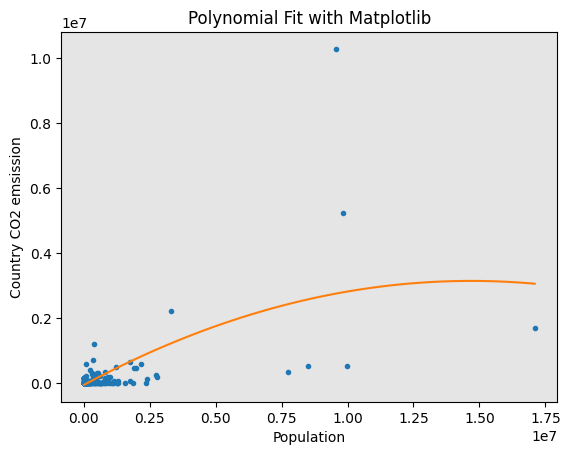

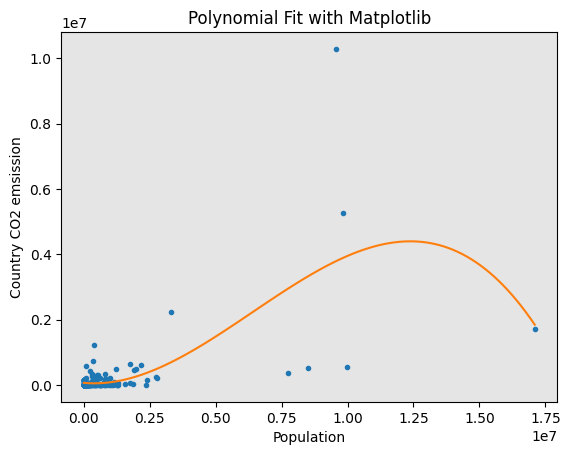

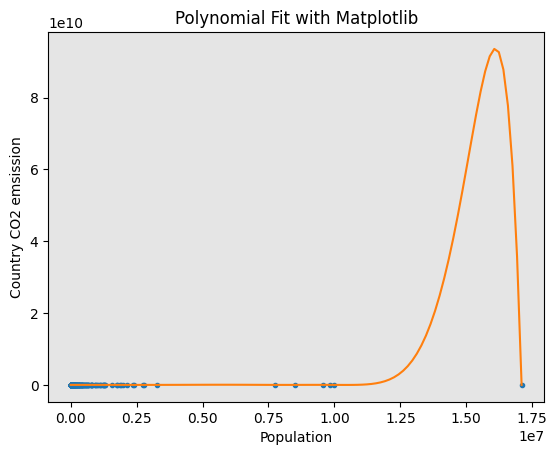

In [158]:
PlotPolly(p1, x, y, 'Population')
PlotPolly(p2, x, y, 'Population')
PlotPolly(p3, x, y, 'Population')


Рахую значення R^2 та MSE для оцінки якості кожної моделі.

In [159]:
from sklearn.metrics import r2_score

# Обчислення mse
mse_second_order = mean_squared_error(df['CO2 emission'], p1(x))
mse_third_order = mean_squared_error(df['CO2 emission'], p2(x))
mse_eleventh_order = mean_squared_error(df['CO2 emission'], p3(x))

p_population_second = np.poly1d(f1)
p_population_thrid = np.poly1d(f2)
p_population_eleventh = np.poly1d(f3)

# Обчислення R^2
r_second_order = r2_score(y, p1(x))
r_thrid_order = r2_score(y, p2(x))
r_eleventh_order = r2_score(y, p3(x))

# Вивід
print(f'R^2 second order     = {r_second_order}')
print(f'mse second order   = {mse_second_order}')
print('')
print(f'R^2 thrid order      = {r_thrid_order}')
print(f'mse thrid order    = {mse_third_order}')
print('')
print(f'R^2 eleventh order   = {r_eleventh_order}')
print(f'mse eleventh order = {mse_eleventh_order}')

16984435292.229088
354890940405.7387
411586514354.2175

R^2 second order     = 0.3698523918567882
mse second order   = 411586514354.2175

R^2 thrid order      = 0.456654507742426
mse thrid order    = 354890940405.7387

R^2 eleventh order   = 0.9739964724260853
mse eleventh order = 16984435292.229088


Висновок
Порівнюючи моделі 3, 4 та 11 порядків, роблю висновок, що модель з порядком 11 є найкращою моделлю для прогнозування 'CO2 emission' на основі нашого набору даних.

<h2>Виконав студент групи ІП-24<br>  Денисенко В'ячеслав</h2>